In [2]:
import numpy as np
import pandas as pd
import scanpy as sc
from matplotlib import rcParams
import matplotlib.pyplot as pl

In [3]:

adata = sc.read_10x_mtx(
    '../data/GSM3161971',  # the directory with the `.mtx` file
    var_names='gene_symbols',                # use gene symbols for the variable names (variables-axis index)
    cache=True)     

sc.pp.filter_cells(adata, min_genes=20)
sc.pp.filter_genes(adata, min_cells=20)
adata.X = adata.X.astype('float64')
adata

AnnData object with n_obs × n_vars = 5789 × 7201
    obs: 'n_genes'
    var: 'gene_ids', 'n_cells'

The top 20 expressed genes in plot below. <br>
The data is not normalized

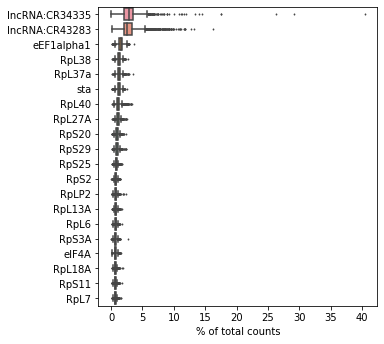

In [4]:
sc.pl.highest_expr_genes(adata, n_top=20, )

# Filter data by mito info

Mitochondrial gene names in this dataset start with 'mt:', the info about mitochondrial genes percent can be added using mentioned pattern

In [5]:
adata.var['mt'] = adata.var_names.str.startswith('mt:')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=True, inplace=True)
adata

AnnData object with n_obs × n_vars = 5789 × 7201
    obs: 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'

The below scatter and violin plot shows:
<ul>
  <li>the number of genes expressed in the count matrix (n_genes_by_counts)</li>
  <li>the total counts per cell (total_counts)</li>
  <li>the percentage of counts in mitochondrial genes (pct_counts_mt)</li>
</ul>

## Scatter in seurat
<div>
<img src="https://i.ibb.co/C58d6qn/scatter1.png" width="400">
</div>
<div>
<img src="https://i.ibb.co/Z2cny0s/scatter2.png" width="400">
</div>
<div>
<img src="https://i.ibb.co/r4SY4Kv/scatter3.png" width="400">
</div>

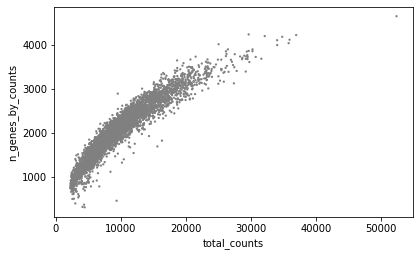

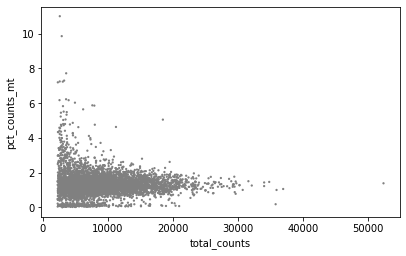

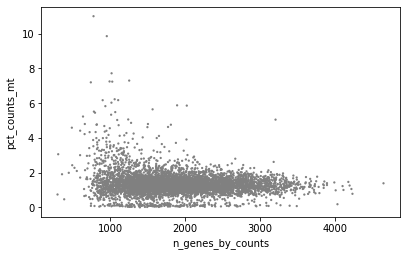

In [6]:
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='n_genes_by_counts', y='pct_counts_mt')

Make same plot but with violin type

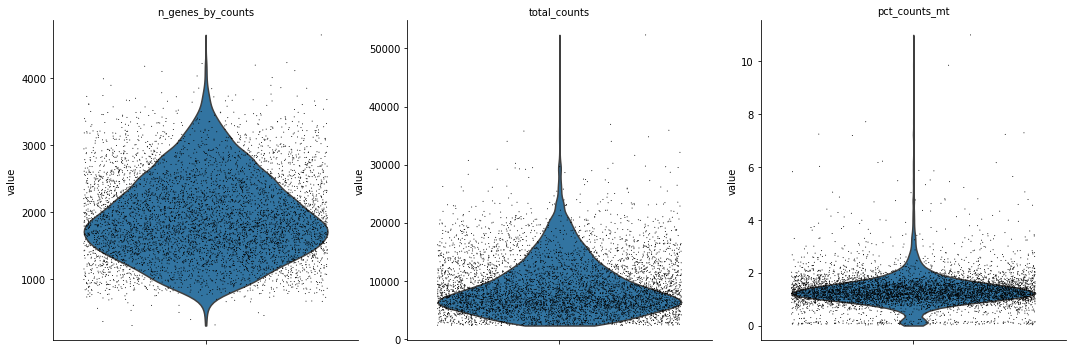

In [7]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

From plots above we can see that most of the cells have mito percent approximately <=3 <br>
And also the variations in genes count variation can be reduced. Most of the cell have genes count >1000

In [8]:
adata = adata[adata.obs.n_genes_by_counts > 1000, :].copy()
adata = adata[adata.obs.pct_counts_mt < 3, :].copy()

adata

AnnData object with n_obs × n_vars = 5391 × 7201
    obs: 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'

# Normalization

In [9]:
pd.DataFrame.sparse.from_spmatrix(adata.X[:100, :100])

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.0,0.0,4.0,6.0,6.0,6.0,0.0,0.0,2.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.0,2.0,3.0,2.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
2,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,2.0,0.0,5.0,4.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,4.0,8.0,4.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,2.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,0.0,2.0,3.0,2.0,1.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
96,1.0,0.0,0.0,3.0,1.0,2.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97,0.0,0.0,2.0,1.0,3.0,1.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0
98,0.0,0.0,0.0,1.0,4.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [10]:
sc.pp.normalize_total(adata, target_sum=1e4) # Total-count normalize (library-size correct) the data matrix X to 10,000 reads per cell, so that counts become comparable among cells.
sc.pp.log1p(adata) # log-normalization
pd.DataFrame.sparse.from_spmatrix(adata.X[:100, :100])

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.0000,0.0,1.067633,1.351375,1.351375,1.351375,0.000000,0.0,0.670003,0.0,...,0.390096,0.000000,0.000000,0.000000,0.000000,0.390096,0.000000,0.000000,0.390096,0.000000
1,0.0000,0.0,1.196465,1.495732,1.196465,0.000000,0.000000,0.0,0.767420,0.0,...,0.000000,0.000000,0.000000,0.767420,0.767420,0.000000,0.000000,0.767420,0.767420,0.000000
2,0.0000,0.0,0.000000,0.000000,1.829836,1.009521,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.009521,0.000000,0.000000
3,0.0000,0.0,0.778405,0.000000,1.372446,1.210747,0.000000,0.0,0.000000,0.0,...,0.000000,0.463103,0.000000,0.463103,0.000000,1.017761,0.000000,0.000000,0.000000,0.000000
4,0.0000,0.0,0.000000,1.264903,1.805909,1.264903,0.492063,0.0,0.000000,0.0,...,0.000000,0.000000,0.492063,0.492063,0.492063,0.820385,0.000000,0.000000,0.492063,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0000,0.0,1.468649,1.794264,1.468649,0.982708,1.468649,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.982708
96,0.5927,0.0,0.000000,1.231567,0.592700,0.962308,0.592700,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
97,0.0000,0.0,1.038739,0.648581,1.318678,0.648581,1.038739,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.537147,0.648581,0.000000,0.000000,0.000000
98,0.0000,0.0,0.000000,0.951786,1.996240,1.752844,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.951786,0.000000,0.000000,0.000000,0.000000


# highly expressed genes in normalized data

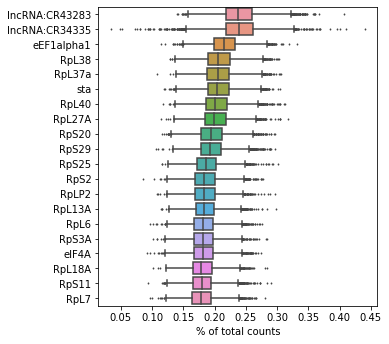

In [11]:
sc.pl.highest_expr_genes(adata, n_top=20, )

False    6487
True      714
Name: highly_variable, dtype: int64

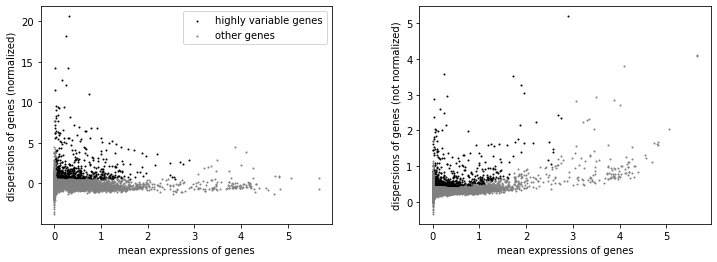

In [12]:
import matplotlib.pyplot as plt
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
gca = sc.pl.highly_variable_genes(adata, show=False, log=False) # can not scale only x
adata.var['highly_variable'].value_counts()

# PCA

To reduce dimensioality need to choose some fixed amount of components that will <br>
explain most of the variance <br>

Here is the Seurat version of Elbow plot 

<div>
<img src="https://i.ibb.co/MBLyC44/pcaelb.png" width="400">
</div>

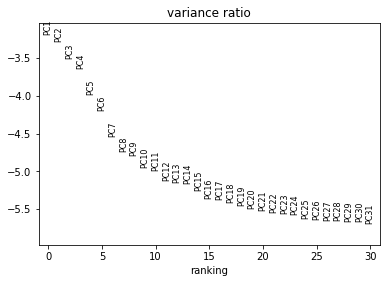

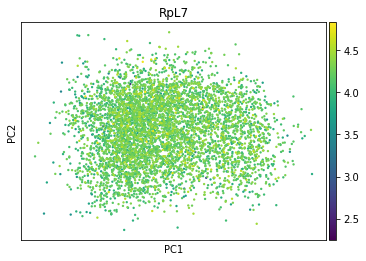

In [13]:
sc.tl.pca(adata, svd_solver='arpack')
sc.pl.pca_variance_ratio(adata, log=True)
sc.pl.pca(adata, color='RpL7')

# UMAP unclustered
To be consistent with Seurat analysis the same number of pca components <br>
will be taken as n_neighbors value

Seurat umap plot

<div>
<img src="https://i.ibb.co/Vw9gjMQ/umap-un.png" width="400">
</div>

e:\education\scipy\7\venv\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


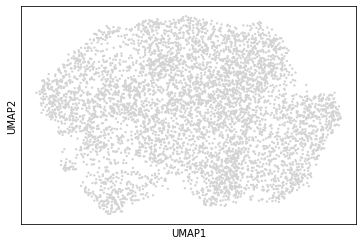

In [14]:
sc.pp.neighbors(adata, n_neighbors=20, n_pcs=20)
sc.tl.umap(adata)
sc.pl.umap(adata)


As it can be seend the umap plot differs in scanpy analysis from seurat analysis

# Tsne unclustered

Same with tsne

<div>
<img src="https://i.ibb.co/ZxCC4SS/tsne-un.png" width="400">
</div>

e:\education\scipy\7\venv\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


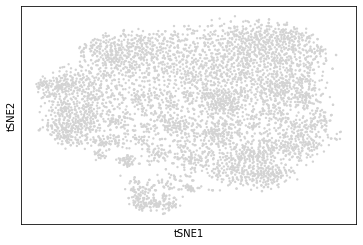

In [19]:
sc.tl.tsne(adata)
sc.pl.tsne(adata)

In [17]:
adata

AnnData object with n_obs × n_vars = 5391 × 7201
    obs: 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'draw_graph'
    obsm: 'X_pca', 'X_umap', 'X_draw_graph_fr'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

# Clustering. UMAP, TSNE

The resolution value is involved in clustering, <br>
the more it will be the more clusters will appear.

The value 0.95 was choosen by experementation and comparison <br>
Seurat results with scanpy by the most experessed genes in clusters.

Here are TSNE and UMAP in Seurat:

<div>
<img src="https://i.ibb.co/9mP5Dxh/tsne-clust.png" width="400">
</div>

<div>
<img src="https://i.ibb.co/Jyh66N0/umap-clust.png" width="400">
</div>

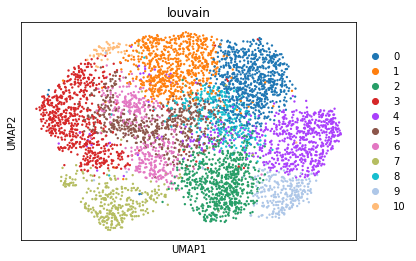

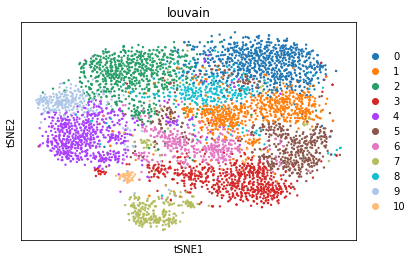

In [21]:
sc.tl.louvain(adata, resolution=0.95)
sc.pl.umap(adata, color='louvain')
sc.pl.tsne(adata, color='louvain')

In seurat resolution value was 0.6 and the number of clusters 8 (0-7) <br>
In scanpy 0.95 and 11 respectevily (0-10)

# Search of good markers in clusters

Some good markers from article are present in 

Seurat analysis

<div>
<img src="https://i.ibb.co/PWBLgy3/genes-check.png" width="400">
</div>

and scanpy analysis:

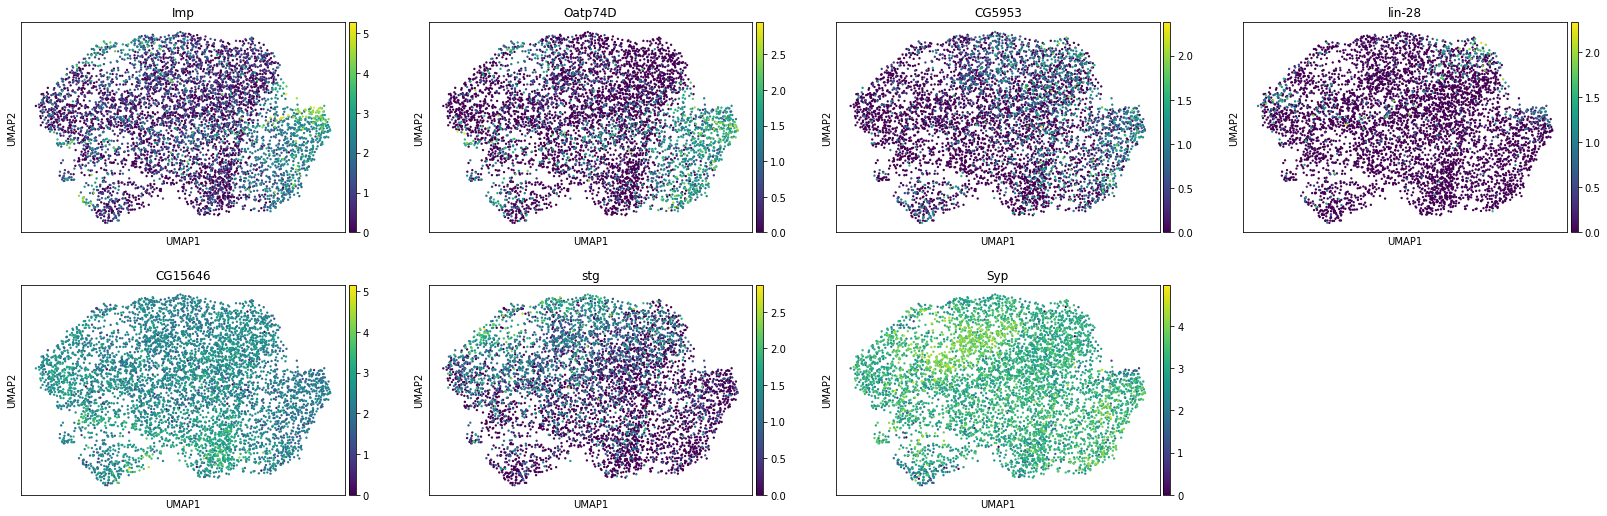

In [22]:
sc.pl.umap(adata, color=['Imp', 'Oatp74D', 'CG5953', 'lin-28', 'CG15646', 'stg', 'Syp'])

# The most expressed genes in clusters

Seurat results:<br>
[0-3] "Thor"            "E(spl)mbeta-HLH" "Hsp68"           "hig"    
[4-7] "PCNA"            "Imp"             "lncRNA:CR45242"  "lncRNA:noe"

In [23]:
sc.tl.rank_genes_groups(adata, 'louvain', method='wilcoxon')
pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(1)

,0,1,2,3,4,5,6,7,8,9,10
0,Thor,Msp300,Bacc,lncRNA:CR44024,Imp,Hsp68,Hsp68,CG14545,CG6770,HmgD,PCNA


As it can be seen some markers are overlapping between two analysis (Seurat and Scanpy) <br>



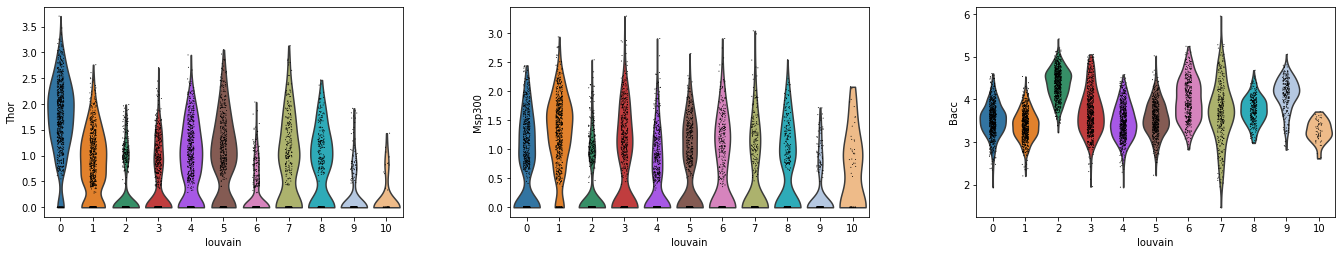

In [24]:
sc.pl.violin(adata, ['Thor', 'Msp300', 'Bacc'], groupby='louvain')

<div>
<img src="https://i.ibb.co/KjJbMCW/clust-high.png" width="400">
</div>

<div>
<img src="https://i.ibb.co/jf0PfJh/clust-high-vio.png" width="400">
</div>

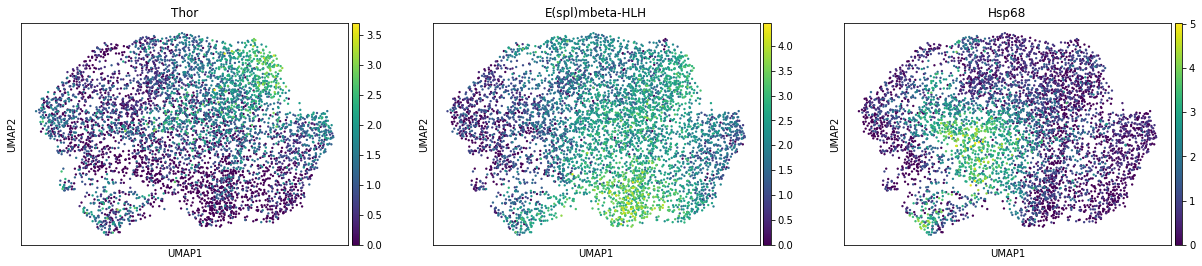

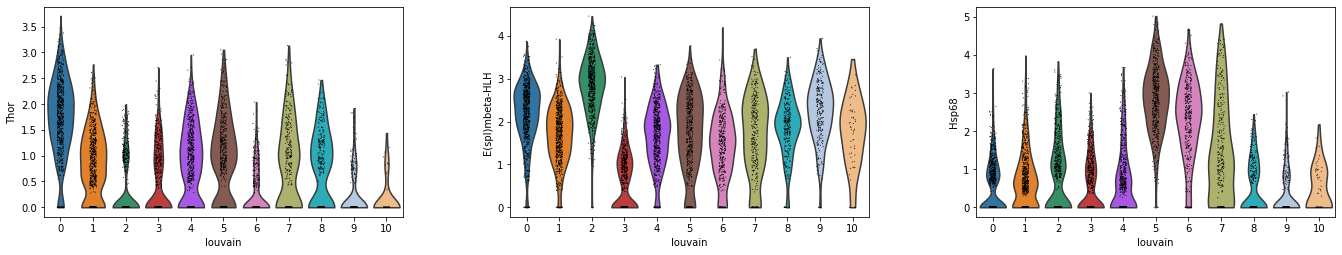

In [25]:
sc.pl.umap(adata, color=["Thor", "E(spl)mbeta-HLH", "Hsp68"])
sc.pl.violin(adata, ['Thor', 'E(spl)mbeta-HLH', 'Hsp68'], groupby='louvain')

Let's print the most expressend genes in clusters with heatmap and dotplot

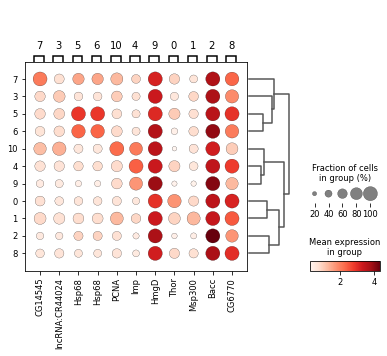

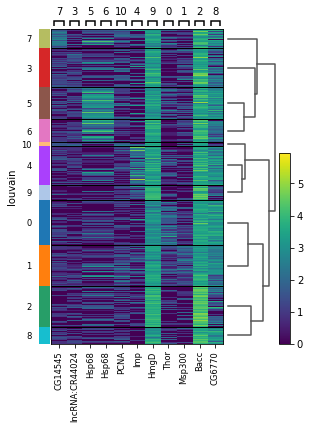

In [26]:
#Thor	Msp300	Bacc	lncRNA:CR44024	Imp	Hsp68	Hsp68	CG14545	CG6770	HmgD	PCNA
marker_genes_dict = {
    '0': ['Thor'],
    '1': ['Msp300'],
    '2': ['Bacc'],
    '3': ['lncRNA:CR44024'],
    '4': ['Imp'],
    '5': ['Hsp68'],
    '6': ['Hsp68'],
    '7': ['CG14545'],
    '8' : ['CG6770'],
    '9' : ['HmgD'],
    '10' : ['PCNA']
}

sc.pl.dotplot(adata, marker_genes_dict, 'louvain', dendrogram=True)

sc.pl.heatmap(adata, marker_genes_dict, groupby='louvain', cmap='viridis', dendrogram=True)